In [86]:
import numpy as np
from numpy.linalg import qr
import pandas as pd 
import matplotlib.pyplot as plt

import random


plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=14) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend

In [87]:
d1 = pd.read_csv('Alexa Fluor 488.csv', index_col=0)
d2 = pd.read_csv('Alexa Fluor 555.csv', index_col=0)

error = np.random.rand(650) * 5 # Error weight factor
s = np.random.uniform(0, 1)

e1 = d1['Emission'] * s 
e2 = d2['Emission'] * (1 - s) 

e3 = (e1 + e2) + error 

wl = d1.index.values

In [88]:
A = np.array([e1/e1.max(), e2/e2.max()]).T

In [89]:
Q,R = qr(A)

In [90]:
estimators = np.dot(np.dot(np.linalg.inv(R), Q.T), e3)

fit = (e1/e1.max())*estimators[0] + (e2/e2.max())*estimators[1]
residuals = (fit - e3)**2

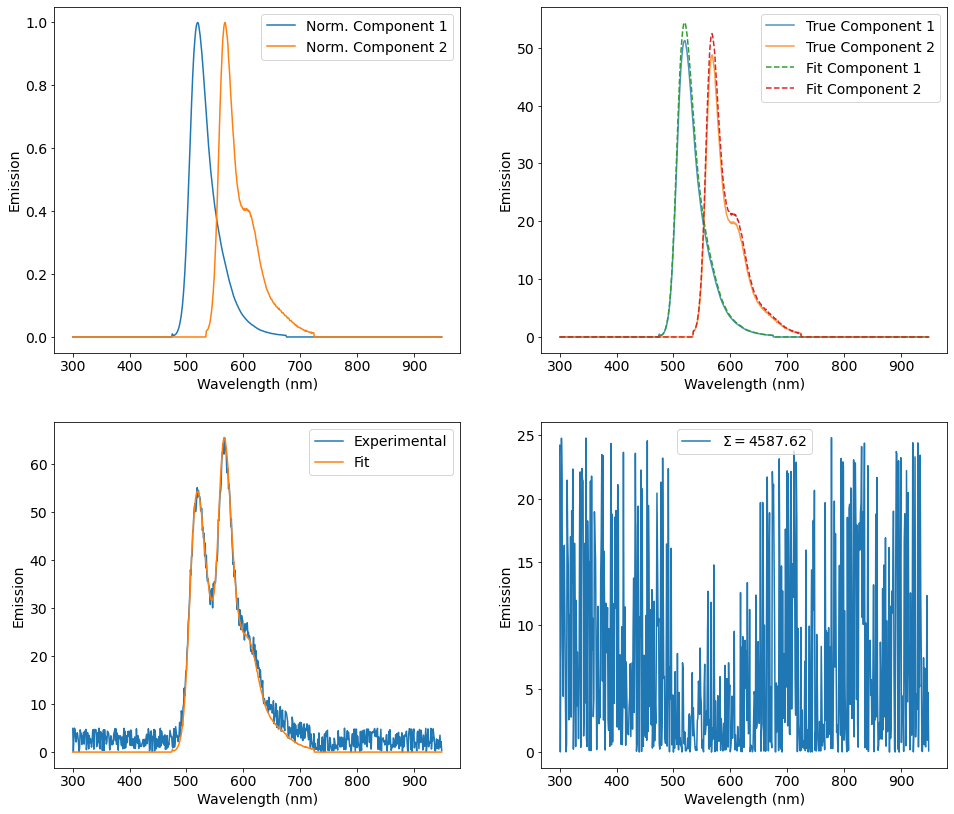

In [91]:
fig, ax = plt.subplots(2,2, figsize=(16,14))
axes = ax.reshape(4)

axes[0].plot(wl, e1/e1.max(), label='Norm. Component 1')
axes[0].plot(wl, e2/e2.max(), label='Norm. Component 2')


axes[1].plot(wl, (e1), label='True Component 1', alpha=0.8)
axes[1].plot(wl, (e2), label='True Component 2', alpha=0.8)
axes[1].plot(wl, (e1/e1.max())*estimators[0], label='Fit Component 1', linestyle='--')
axes[1].plot(wl, (e2/e2.max())*estimators[1], label='Fit Component 2', linestyle='--')


axes[2].plot(wl, e3, label='Experimental')
axes[2].plot(wl, fit, label='Fit')

axes[3].plot(wl, residuals, label=f'$\Sigma  = {round(residuals.sum(), 2)}$')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

for ax in axes:
    
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Emission')

plt.show()

In [104]:
# Try with 3 dyes

In [138]:
d1 = pd.read_csv('Alexa Fluor 488.csv', index_col=0)
d2 = pd.read_csv('Alexa Fluor 555.csv', index_col=0)
d3 = pd.read_csv('Alexa Fluor 594.csv', index_col=0)

error = np.random.rand(650) * 5 # Error weight factor
s = np.random.uniform(0, 1)

e1 = d1['Emission'] * s 
e2 = d2['Emission'] * (1 - s) 
e3 = d3['Emission'] * (s + 0.25) 

e4 = (e1 + e2 + e3) + error 

wl = d1.index.values

In [139]:
A = np.array([e1/e1.max(), e2/e2.max(), e3/e3.max()]).T

In [140]:
Q,R = qr(A)

In [141]:
estimators = np.dot(np.dot(np.linalg.inv(R), Q.T), e4)

fit = (e1/e1.max())*estimators[0] + (e2/e2.max())*estimators[1] + (e3/e3.max())*estimators[2]
residuals = (fit - e4)**2

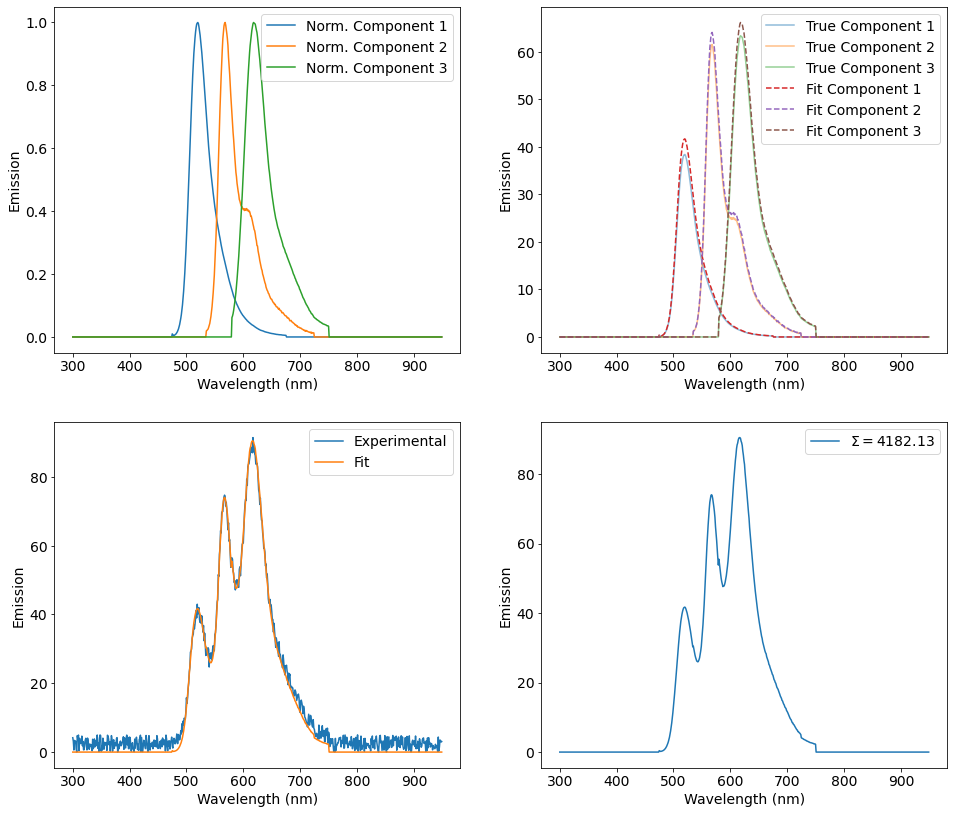

In [143]:
fig, ax = plt.subplots(2,2, figsize=(16,14))
axes = ax.reshape(4)

axes[0].plot(wl, e1/e1.max(), label='Norm. Component 1')
axes[0].plot(wl, e2/e2.max(), label='Norm. Component 2')
axes[0].plot(wl, e3/e3.max(), label='Norm. Component 3')


axes[1].plot(wl, (e1), label='True Component 1', alpha=0.5)
axes[1].plot(wl, (e2), label='True Component 2', alpha=0.5)
axes[1].plot(wl, (e3), label='True Component 3', alpha=0.5)
axes[1].plot(wl, (e1/e1.max())*estimators[0], label='Fit Component 1', linestyle='--')
axes[1].plot(wl, (e2/e2.max())*estimators[1], label='Fit Component 2', linestyle='--')
axes[1].plot(wl, (e3/e3.max())*estimators[2], label='Fit Component 3', linestyle='--')


axes[2].plot(wl, e4, label='Experimental')
axes[2].plot(wl, fit, label='Fit')

# axes[3].plot(wl, residuals, label=f'$\Sigma  = {round(residuals.sum(), 2)}$')
axes[3].plot(wl, fit, label=f'$\Sigma  = {round(residuals.sum(), 2)}$')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

for ax in axes:
    
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Emission')

plt.show()

In [151]:
# Rx = Q.Tb

y = np.dot(Q.T, e4)
def back_sub(U, y):
    
    n = U.shape[0]
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        s = 0 
        for j in range(i+1, n):
            s += U[i][j] * x[j]
        x[i]= (y[i] - s) / U[i][i]
        
    return x

back_sub(R, y)

array([41.70841848, 64.11689327, 66.20984679])

In [146]:
# Normal equations

x1 = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), e4)

In [148]:
estimators, x1

(array([41.70841848, 64.11689327, 66.20984679]),
 array([41.70841848, 64.11689327, 66.20984679]))